In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

# set up output file
output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)



In [3]:
# set lists for latitudes and longitudes and cities
lat_lngs = []
cities = []

# random list of latitudes and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     append unique cities to city list
    if city not in cities:
        cities.append(city)
        
len(cities)

610

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "London"
# cities = ["London", "Paris", "Boston"]
df_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


for city in cities:
    print(f"Retrieving results for Index (index): (city).")
    query_url = base_url + "appid=" + weather_api_key + "&units=imperial" + "&q="+ city
    response = requests.get(query_url).json()
    try:
        print(city)
        df_cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("city not found")
    
    





teano
luanda
constantine
chuy
airai
nabire
san quintin
khatanga
richards bay
hualmay
husavik
kruisfontein
kuytun
port hardy
jamestown
yarmouth
longyearbyen
cherskiy
hilo
ushuaia
grindavik
qaanaaq
chokurdakh
cape town
bethanien
rikitea
illoqqortoormiut
city not found
albany
alofi
buea
bluff
nome
brigantine
tiksi
neiafu
harrisburg
jieshi
caravelas
broken hill
mataura
warrnambool
kaduqli
saint-philippe
thompson
muscat
agirish
punta arenas
san cristobal
avarua
vaitupu
city not found
aksu
praya
east london
barentsburg
city not found
burpengary
nikolskoye
kapaa
mys shmidta
city not found
noumea
lavrentiya
barrow
hainichen
santa eulalia del rio
city not found
nouakchott
butaritari
castro
saint anthony
san patricio
northam
yellowknife
dukat
kuchinarai
feijo
shakawe
port alfred
mahebourg
campbell river
xadani
city not found
new norfolk
petropavlovsk-kamchatskiy
avera
platon sanchez
mabaruma
cidreira
camalu
lebu
vardo
ponta do sol
hofn
yakima
georgetown
zhigalovo
arraial do cabo
majur
atuona
str

In [5]:
print(len(df_cities))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

556
556
556
556
556
556
556
556
556


In [6]:
city_dict = {"City": df_cities,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp, 
                "Humidity": humidity,
                "Cloudiness": cloudiness, 
                "Wind Speed": wind_speed, 
                "Country": country,
                "Date": date}

city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teano,41.2513,14.0665,62.92,90,7,2.82,IT,1666572003
1,Luanda,-8.8368,13.2343,75.79,85,98,7.38,AO,1666572003
2,Constantine,36.3650,6.6147,58.41,47,0,4.61,DZ,1666572004
3,Chui,-33.6971,-53.4616,56.61,95,77,6.26,UY,1666572004
4,Airai,-8.9266,125.4092,74.62,51,51,0.98,TL,1666572004


In [7]:


output_data_file = "output_data/cities.csv"



city_data.to_csv(output_data_file, index=False)

In [8]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.421707,19.704024,59.345953,73.816547,59.174460,8.052410,1.666572e+09
std,33.484108,91.797024,20.022038,19.200379,41.421457,5.874652,1.131745e+02
min,-54.800000,-179.166700,-1.770000,13.000000,0.000000,0.000000,1.666571e+09
25%,-8.239825,-62.054150,45.930000,63.000000,13.750000,3.440000,1.666572e+09
50%,24.854500,21.295700,64.220000,79.000000,75.000000,6.465000,1.666572e+09
75%,48.100025,103.560325,75.487500,88.250000,100.000000,11.210000,1.666572e+09
max,78.218600,179.316700,101.950000,100.000000,100.000000,33.510000,1.666572e+09


In [9]:
# Get the indices of cities that have humidity over %100
# humidity_indices = []
# # humidity_df = weather_data["Humidity"] >100
# # for row in humidity_df:
#     if 


humidity_indices = city_data.index[(city_data["Humidity"] > 100)].tolist()
print(humidity_indices)



[]


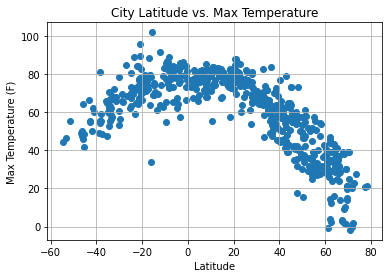

In [10]:
# no cities have humidity over 100%; dataframe is clean
x_val = city_data["Lat"]
# y_val1 = city_data["Max Temp"]
plt.scatter(x_val, max_temp)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/lat_v_max_temp.png")
plt.show()

In [ ]:
print("Analysis of temperature in compared to latitude shows a clear relationship between temperature and latitude. \n
The closer to the eqator (latitude 0) a location is, the higher the maximum temperature.")

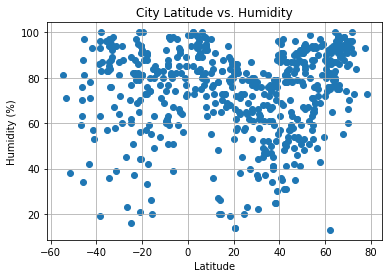

In [11]:
plt.scatter(x_val, humidity)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/lat_v_humidity.png")
plt.show()

In [ ]:
print("There does not appear to be a strong correlation between latitude and humidity based on the data in the chart above.\n
There appear to be slightly more cities with high humidity in higher nothern latitudes, but this may be due to there being a greater percentage of cities in the northern latitudes in the dataframe.")

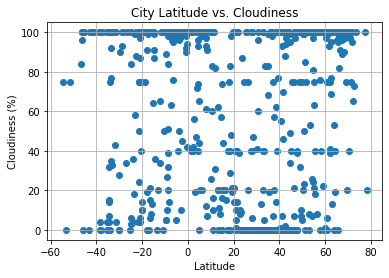

In [12]:
plt.scatter(x_val, cloudiness)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/lat_v_cloudiness.png")
plt.show()

In [ ]:
print("There is no obvious correlation between cloudiness and latitude.")

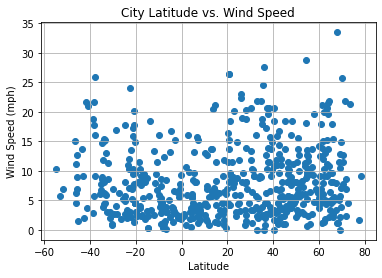

In [13]:
plt.scatter(x_val, wind_speed)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/lat_v_wind_speed.png")
plt.show()

In [ ]:
print("Wind Speed appears to be fairly similar across all latitudes.")

The r-value is: -0.8681576348499336


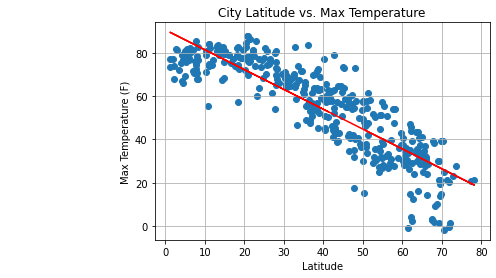

In [14]:
northern_city_data = city_data.loc[(city_data["Lat"]> 0)]
northern_x_val = northern_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Max Temp"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_x_val, northern_city_data["Max Temp"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/northern_lat_v_max_temp.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.6575584760621901


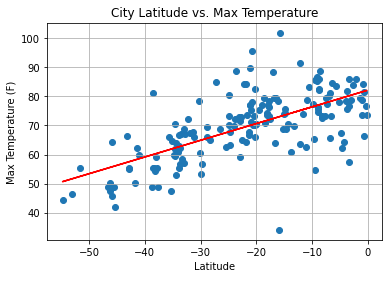

In [15]:
southern_city_data = city_data.loc[(city_data["Lat"]< 0)]
southern_x_val = southern_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Max Temp"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_x_val, southern_city_data["Max Temp"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/southern_lat_v_max_temp.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [ ]:
print("There is a negative correlation between temperature and latitude in the northern hemisphere and a positive correlation in the southern hemisphere.\n
Both relationships show that temperatures are higher in locations closer to the equator.")

The r-value is: 0.12934524797127692


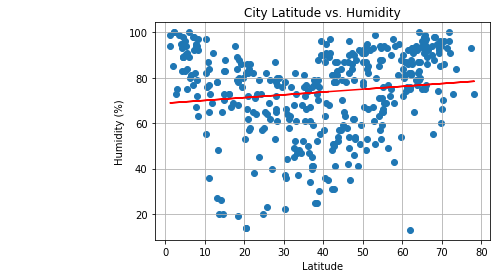

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Humidity"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(northern_x_val, northern_city_data["Humidity"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/northern_lat_v_humidity.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.04677574618225411


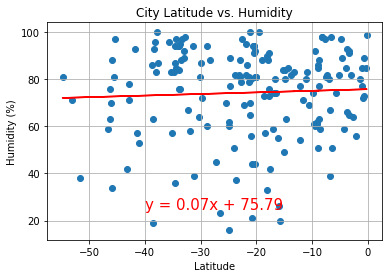

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Humidity"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(southern_x_val, southern_city_data["Humidity"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/southern_lat_v_humidity.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [ ]:
print("There appears to be very slight correlations between city latitude and humidity in the northern hemisphere, showing that there is an increase in humidity as distance from the equator increases.  \n
However, the correlation of those two variables in the southern hemisphere is negligible")

The r-value is: 0.23472026631958523


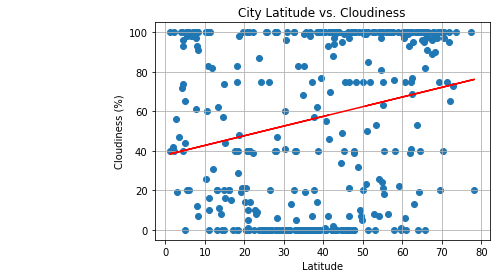

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Cloudiness"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_val, northern_city_data["Cloudiness"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40, 50),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/northern_lat_v_cloudiness.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.052212562790062235


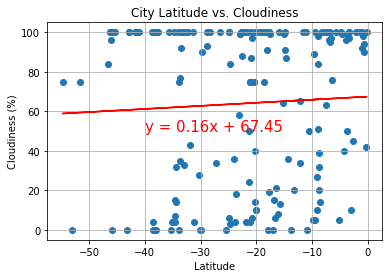

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Cloudiness"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_val, southern_city_data["Cloudiness"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40, 50),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/southern_lat_v_cloudiness.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [ ]:
print("Linear regression shows relationships between cloudiness and distance from the equator, although the scatter plot shows no clear relationship between the two variables")

The r-value is: 0.13596181106593538


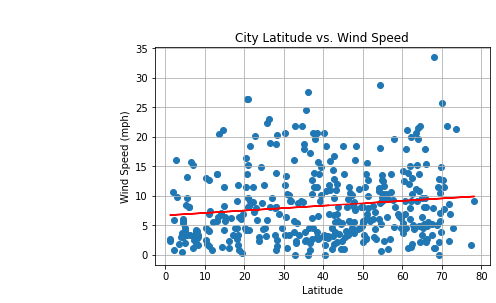

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_val, northern_city_data["Wind Speed"])
regress_values = northern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_val, northern_city_data["Wind Speed"])
plt.plot(northern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/northern_lat_v_wind_speed.png")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.28336447211845067


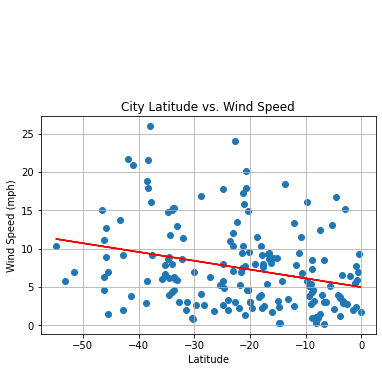

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_val, southern_city_data["Wind Speed"])
regress_values = southern_x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_val, southern_city_data["Wind Speed"])
plt.plot(southern_x_val, regress_values, "r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/southern_lat_v_wind_speed.png")
print(f"The r-value is: {rvalue}")

plt.show()

In [ ]:
print("Separate analysis of the northern and southern hemispheres shows wind speed increasing the further from the eqator a location is.")